# building and optimize word models
Sam Tomioka



In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

ModuleNotFoundError: No module named 'tensorflow'

In [34]:
df = pd.read_csv("train_data/ae_meta.csv")
df.head
X = df[['ID', 'text']]
y = df['sdtm'].tolist()

(X_train, X_test, y_train, y_test) = train_test_split(
    X, y, test_size=0.2, random_state=2018,
)


## TFIDF alone

In [90]:
pipe = Pipeline([('tfidf',TfidfVectorizer(min_df=3, max_df=10)), ("clf", LogisticRegression())])
np.mean(cross_val_score(pipe, X_train["text"], y_train, cv=10))

C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.6405821627137254

In [91]:
pipe = Pipeline([('tfidf',TfidfVectorizer(min_df=3, max_df=10)), ("clf", AdaBoostClassifier( learning_rate=0.01, n_estimators = 500))])
np.mean(cross_val_score(pipe, X_train["text"], y_train, cv=10))

C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.6025520108264882

In [ ]:
pipe = Pipeline([('tfidf',TfidfVectorizer(min_df=3, max_df=10)), ("clf", GradientBoostingClassifier(n_estimators= 500, learning_rate=0.01))])
np.mean(cross_val_score(pipe, X_train["ID"], y_train, cv=10)), np.mean(cross_val_score(pipe, X_train["text"], y_train, cv=10))

## word2vector alone

In [49]:
def texts_encoder(texts):
    with tf.Graph().as_default():
        embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1")
        embeddings = embed(texts)
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            sess.run(tf.tables_initializer())
            result = sess.run(embeddings)
    return result


class  MeanEmbeddingVectorizer:
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def transform(self, X):
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()
        return texts_encoder(X)

pipe = Pipeline([
    ('w2v',MeanEmbeddingVectorizer()), 
    ("clf", LogisticRegression())])
np.mean(cross_val_score(pipe, X_train["text"], y_train, cv=10))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver

C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver

(0.6344017788470203, 0.7924854841580011)

In [107]:
def texts_encoder(texts):
    with tf.Graph().as_default():
        embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1")
        embeddings = embed(texts)
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            sess.run(tf.tables_initializer())
            result = sess.run(embeddings)
    return result


class  MeanEmbeddingVectorizer:
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def transform(self, X):
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()
        return texts_encoder(X)

pipe = Pipeline([
    ('w2v',MeanEmbeddingVectorizer()), 
    ("clf", GradientBoostingClassifier(loss='deviance', 
                                       learning_rate=0.01, 
                                       n_estimators=500, 
                                       subsample=0.8, 
                                       criterion='friedman_mse', 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, 
                                       max_depth=3, 
                                       min_impurity_decrease=0.0, 
                                       verbose=0, 
                                       max_leaf_nodes=None, warm_start=False, presort='auto'))])
np.mean(cross_val_score(pipe, X_train["text"], y_train, cv=10))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver

0.8921776334214664

## TFIDF and WORD2VECTOR

In [108]:

class  TfIdfWord2VecVectorizer:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.tfidf_model = TfidfVectorizer(min_df=3, max_df=10).fit(X)
        return self

    def transform(self, X):
        return self.tfidf_and_w2v(X, self.tfidf_model)

    def texts_encoder(self, texts):
        with tf.Graph().as_default():
            embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1")
            embeddings = embed(texts)
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                sess.run(tf.tables_initializer())
                result = sess.run(embeddings)
        return result

    def tfidf_and_w2v(self, X, tfidf_model):
        tmp = tfidf_model.transform(X)
        a = tmp.toarray()
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()
        b = self.texts_encoder(X)
        return np.hstack((a, b))

pipe_1 = Pipeline([
    ('vector',TfIdfWord2VecVectorizer()), 
     ("clf", LogisticRegression())])
np.mean(cross_val_score(pipe_1, X_train["text"], y_train, cv=10))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver

0.8190993871461456

In [109]:
predicted =  cross_val_predict(pipe_1, X_train["text"], y_train, cv=10)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver

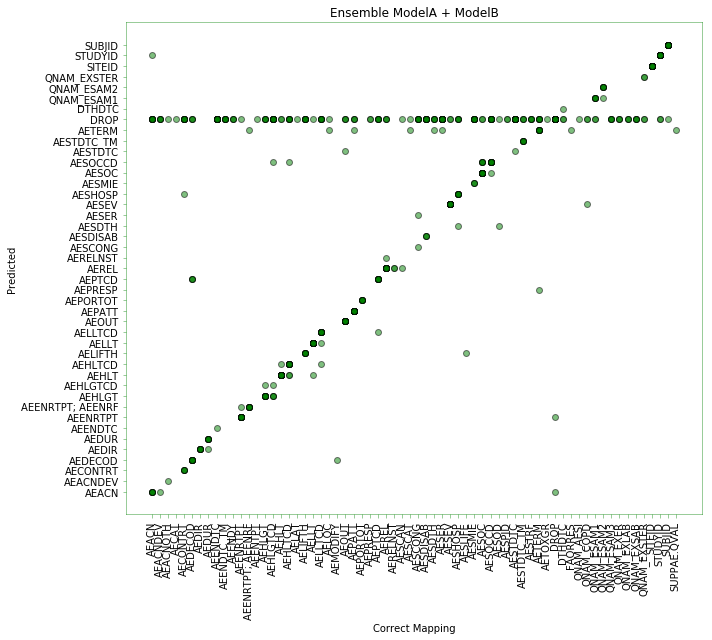

In [110]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,9))
ax.scatter(y_train, predicted, edgecolors=(0,0,0), alpha=0.5, color='green')
#ax.plot([y.min(), y.max()],[y.min(),y.max()], 'k--', lw=4)
ax.set_xlabel('Correct Mapping', )
plt.xticks(rotation=90)
ax.set_ylabel('Predicted')
plt.title('Ensemble ModelA + ModelB')

plt.setp(ax.spines.values(),alpha=0.5, color='green' )
plt.setp([ax.get_xticklines(), ax.get_yticklines()],alpha=0.5, color='green')
plt.tight_layout()
plt.savefig("tfidf_word2vec.png", dpi=150)
plt.show()

In [98]:

class  TfIdfWord2VecVectorizer:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.tfidf_model = TfidfVectorizer(min_df=3, max_df=10).fit(X)
        return self

    def transform(self, X):
        return self.tfidf_and_w2v(X, self.tfidf_model)

    def texts_encoder(self, texts):
        with tf.Graph().as_default():
            embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1")
            embeddings = embed(texts)
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                sess.run(tf.tables_initializer())
                result = sess.run(embeddings)
        return result

    def tfidf_and_w2v(self, X, tfidf_model):
        tmp = tfidf_model.transform(X)
        a = tmp.toarray()
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()
        b = self.texts_encoder(X)
        return np.hstack((a, b))

pipe3 = Pipeline([
    ('vector',TfIdfWord2VecVectorizer()), 
    ("clf", GradientBoostingClassifier(loss='deviance', 
                                       learning_rate=0.01, 
                                       n_estimators=500, 
                                       subsample=0.8, 
                                       criterion='friedman_mse', 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, 
                                       max_depth=3, 
                                       min_impurity_decrease=0.0, 
                                       verbose=0, 
                                       max_leaf_nodes=None, warm_start=False, presort='auto'))])
np.mean(cross_val_score(pipe3, X_train["text"], y_train, cv=10))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver

0.9142281679608132

In [99]:

class  TfIdfWord2VecVectorizer:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.tfidf_model = TfidfVectorizer(min_df=3, max_df=10).fit(X)
        return self

    def transform(self, X):
        return self.tfidf_and_w2v(X, self.tfidf_model)

    def texts_encoder(self, texts):
        with tf.Graph().as_default():
            embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1")
            embeddings = embed(texts)
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                sess.run(tf.tables_initializer())
                result = sess.run(embeddings)
        return result

    def tfidf_and_w2v(self, X, tfidf_model):
        tmp = tfidf_model.transform(X)
        a = tmp.toarray()
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()
        b = self.texts_encoder(X)
        return np.hstack((a, b))

pipe4 = Pipeline([
    ('vector',TfIdfWord2VecVectorizer()), 
    ("clf", AdaBoostClassifier(learning_rate=0.01))])
np.mean(cross_val_score(pipe4, X_train["text"], y_train, cv=10))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver

0.6237311980481719

In [63]:
predicted =  cross_val_predict(pipe, X_train["text"], y_train, cv=10)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver

In [100]:
pipe3.fit(X_train["text"], y_train)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Pipeline(memory=None,
     steps=[('vector', <__main__.TfIdfWord2VecVectorizer object at 0x000001B6287FB0F0>), ('clf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity...      presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False))])

In [101]:
# predict test instances
y_preds = pipe3.predict(X_test["text"])
accuracy_score(y_test, y_preds, normalize=True)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.886039886039886

In [104]:
y_preds

array(['DROP', 'DROP', 'DROP', 'AESTDTC', 'AEHLGT', 'DROP', 'DROP',
       'DROP', 'DROP', 'DROP', 'AEENDTC', 'AEACNOTH', 'DROP', 'AEHLGTCD',
       'SUBJID', 'AESOC', 'DROP', 'DROP', 'DROP', 'STUDYID', 'AEACN',
       'DROP', 'DROP', 'DROP', 'DROP', 'AEHLGTCD', 'DROP', 'QNAM_ESAM2',
       'DROP', 'AEHLGTCD', 'AEACNDEV', 'DROP', 'DROP', 'DROP', 'AELAT',
       'AETERM', 'DROP', 'DROP', 'DROP', 'DROP', 'DROP', 'DROP', 'AEPTCD',
       'DROP', 'DROP', 'DROP', 'DROP', 'AELAT', 'AEPTCD', 'DROP',
       'AESTRF', 'AELAT', 'DROP', 'DROP', 'QNAM_AESI', 'DROP', 'DROP',
       'DROP', 'DROP', 'DROP', 'AEHLGT', 'AETERM', 'DROP', 'DROP',
       'SITEID', 'AEPTCD', 'QNAM_ESAM1', 'DROP', 'DROP', 'DROP',
       'AEHLGTCD', 'DROP', 'DROP', 'DROP', 'DROP', 'DROP',
       'AEENRTPT; AEENRF', 'AESTDTC', 'STUDYID', 'DROP', 'DROP', 'AESOC',
       'DROP', 'DROP', 'DROP', 'DROP', 'QNAM_COPD', 'DROP', 'AESER',
       'DROP', 'DROP', 'DROP', 'DROP', 'DROP', 'DROP', 'DROP', 'DROP',
       'DROP', 'DROP', 'AE

In [105]:
cohen_kappa_score(y_preds, y_test)


0.8276031434184676

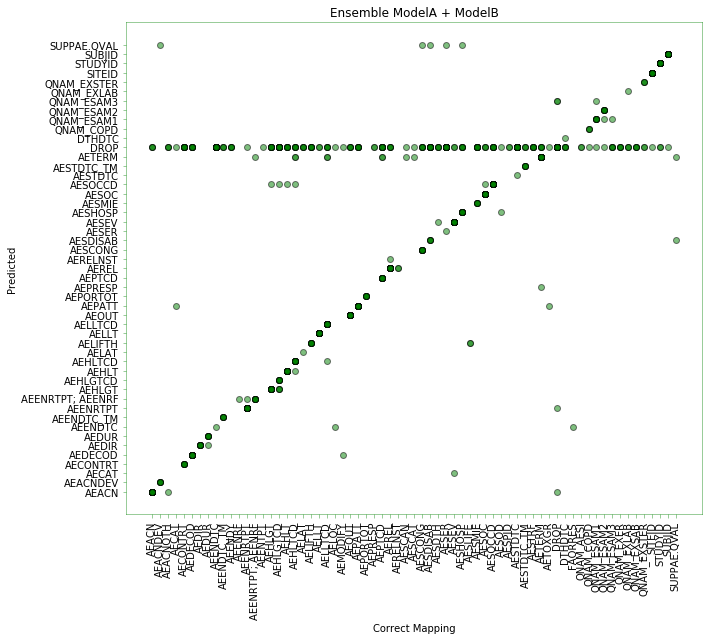

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,9))
ax.scatter(y, predicted, edgecolors=(0,0,0), alpha=0.5, color='green')
#ax.plot([y.min(), y.max()],[y.min(),y.max()], 'k--', lw=4)
ax.set_xlabel('Correct Mapping', )
plt.xticks(rotation=90)
ax.set_ylabel('Predicted')
plt.title('Ensemble ModelA + ModelB')

plt.setp(ax.spines.values(),alpha=0.5, color='green' )
plt.setp([ax.get_xticklines(), ax.get_yticklines()],alpha=0.5, color='green')
plt.tight_layout()
plt.savefig("tfidf_word2vec.png", dpi=150)
plt.show()

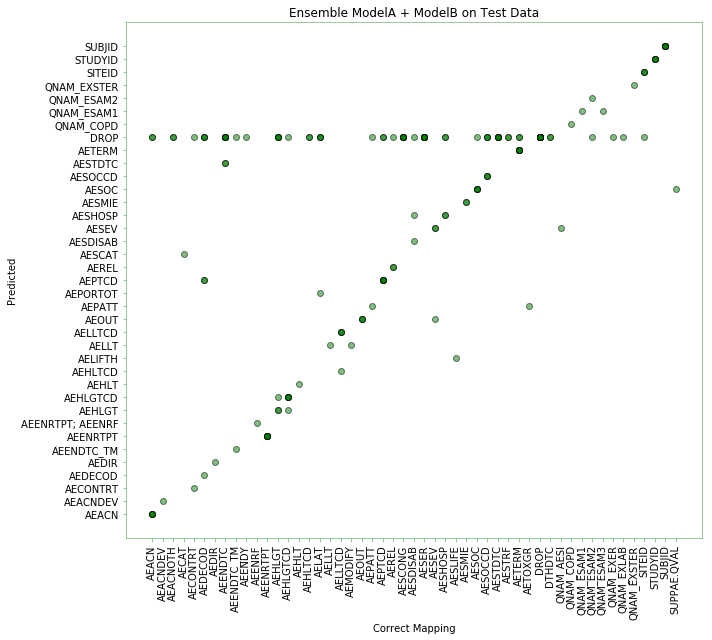

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,9))
ax.scatter(y_test, y_preds, edgecolors=(0,0,0), alpha=0.5, color='green')
#ax.plot([y.min(), y.max()],[y.min(),y.max()], 'k--', lw=4)
ax.set_xlabel('Correct Mapping', )
plt.xticks(rotation=90)
ax.set_ylabel('Predicted')
plt.title('Ensemble ModelA + ModelB on Test Data')

plt.setp(ax.spines.values(),alpha=0.5, color='green' )
plt.setp([ax.get_xticklines(), ax.get_yticklines()],alpha=0.5, color='green')
plt.tight_layout()
plt.savefig("tfidf_word2vec-test.png", dpi=150)
plt.show()